In [1]:
library(caret)
library(mlbench)
library(dplyr)
library(base)
library(caTools)
library(e1071)
library(ROCR)
library(Metrics)
library(ggplot2)
library(rpart)
library(randomForest)
library(class)


Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess


Attaching package: 'Metrics'

The following objects are masked from 'package:caret':

    precision, recall

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



# LOADING THE DATASET

In [2]:
#pima <- read.csv("C:/Users/Praty/OneDrive/Desktop/pima-indians-diabetes.csv")
pima = read.csv("C:/Users/Praty/OneDrive/Desktop/filtered_pima.csv")
head(pima)

X,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diabetes
1,6,148,72,35,30.5,33.6,0.6270,50,1
2,1,85,66,29,30.5,26.6,0.3510,31,0
3,8,183,64,23,30.5,23.3,0.6720,32,1
4,1,89,66,23,94.0,28.1,0.1670,21,0
5,0,137,40,35,168.0,43.1,0.3725,33,1
6,5,116,74,23,30.5,25.6,0.2010,30,0


In [12]:
# FINDING THE OUTLIERS BY BOX PLOT
#boxplot(pima$X1~.,data = pima, xlab = 'a', ylab= 'b', main = 'pima data')

[1] 268

In [7]:
# Data cleaning and data information
summary(pima)

       X          pregnancies        glucose       bloodpressure   
 Min.   :  1.0   Min.   : 0.000   Min.   : 44.00   Min.   : 24.00  
 1st Qu.:192.8   1st Qu.: 1.000   1st Qu.: 99.75   1st Qu.: 64.00  
 Median :384.5   Median : 3.000   Median :117.00   Median : 72.00  
 Mean   :384.5   Mean   : 3.783   Mean   :121.66   Mean   : 72.39  
 3rd Qu.:576.2   3rd Qu.: 6.000   3rd Qu.:140.25   3rd Qu.: 80.00  
 Max.   :768.0   Max.   :13.000   Max.   :199.00   Max.   :122.00  
 skinthickness      insulin            bmi       diabetespedigreefunction
 Min.   : 7.00   Min.   : 14.00   Min.   :18.2   Min.   :0.0780          
 1st Qu.:23.00   1st Qu.: 30.50   1st Qu.:27.5   1st Qu.:0.2437          
 Median :23.00   Median : 30.50   Median :32.0   Median :0.3718          
 Mean   :27.24   Mean   : 75.77   Mean   :32.2   Mean   :0.4277          
 3rd Qu.:32.00   3rd Qu.:110.00   3rd Qu.:36.3   3rd Qu.:0.5823          
 Max.   :63.00   Max.   :318.00   Max.   :50.0   Max.   :1.1910          
      

In [8]:
# checking the datatypes of variables
sapply(pima, class)

X              pregnancies                  glucose 
               "integer"                "integer"                "integer" 
           bloodpressure            skinthickness                  insulin 
               "integer"                "integer"                "numeric" 
                     bmi diabetespedigreefunction                      age 
               "numeric"                "numeric"                "integer" 
                diabetes 
               "integer"

In [ ]:
# Finding the missing values in pima dataset
head(sum(is.na(pima)))

In [3]:
nom1 = preProcess(pima[,c(1:10)], method=c('center','scale'))
#nom1 = preProcess(pima[,c(1:9)], method=c('range'))
norm1 = predict(nom1, pima[,c(1:10)])


# APPLYING MACHINE LEARNING MODELS

In [ ]:
#LOGISTIC REGRESSION
glmModel = train(factor(diabetes)~., data = train_data,method='glm',family='binomial')
predictTest = predict(glmModel, newdata = test_data)
confusionMatrix(predictTest, factor(test_data$diabetes), mode = 'everything')

#DECISION TREES
DT = train(factor(diabetes)~., data = train_data, method = 'rpart')
pt1 = predict(DT, newdata = test_data)
confusionMatrix(pt1, reference = factor(test_data$diabetes), mode = 'everything')

#Support Vector Machine
svmfit = svm(factor(diabetes)~ ., data = train_data, kernel = "linear", cost = 10, scale = FALSE)
pt2 = predict(svmfit, newdata=test_data)
confusionMatrix(pt2, reference = factor(test_data$diabetes), mode='everything')

# NAIVE BAYES
NAIVE_BAYES = naiveBayes(factor(diabetes) ~ ., data = train_data) 
predictTest2 = predict(NAIVE_BAYES,newdata=test_data)
cm = table(test_data$diabetes, predictTest2)
confusionMatrix(cm,mode='everything')

# RANDOM FOREST
forest = randomForest(factor(diabetes)~., data = train_data)
pt = predict(forest, newdata= test_data)
confusionMatrix(pt, reference = factor(test_data$diabetes), mode = 'everything')

#XGBOOST
control6 = trainControl(method = 'repeatedcv',number = 10,repeats = 3, 
                        returnResamp = "all",savePredictions = "all")
XGBoost = train(factor(diabetes)~., data = train_data , method="xgbLinear", 
                      trControl =control6,verbose = FALSE)
predictTest5 = predict(XGBoost, newdata = test_data)
confusionMatrix(predictTest5,reference = factor(test_data$diabetes),mode = 'everything')

In [4]:
#APPLYING MODELS
Train = createDataPartition(norm1$diabetes, p =0.8, list = FALSE)
train_data = norm1[Train,]
test_data = norm1[-Train,]

In [5]:
# train_data
head(train_data)

,X,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diabetes
1,-1.728670,0.6779851,0.8654807,-0.0319691,0.8763697,-0.6788110,0.2185522,0.8130639,1.55938337,1.3650064
4,-1.715148,-0.8507657,-1.0728676,-0.5279745,-0.4780866,0.2733089,-0.6394074,-1.0632436,-1.06377271,-0.7316434
5,-1.710640,-1.1565159,0.5040938,-2.6773314,0.8763697,1.3828659,1.7004825,-0.2250236,0.02167119,1.3650064
6,-1.706132,0.3722349,-0.1858268,0.1333660,-0.4780866,-0.6788110,-1.0293891,-0.9245600,-0.24968979,-0.7316434
7,-1.701625,-0.2392654,-1.4342546,-1.8506557,0.5377556,0.1833448,-0.1870287,-0.7328503,-0.61150442,1.3650064
9,-1.692610,-0.5450156,2.4752954,-0.1973042,2.0050834,-0.6788110,-0.2650250,-1.0999539,1.83074435,1.3650064


In [6]:
# test_data
head(test_data)

,X,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diabetes
2,-1.724163,-0.8507657,-1.2042810,-0.5279745,0.1991415,-0.678811,-0.8733964,-0.3127206,-0.15923613,-0.7316434
3,-1.719655,1.2894854,2.0153484,-0.6933097,-0.4780866,-0.678811,-1.3881722,0.9966157,-0.06878247,1.3650064
8,-1.697117,1.9009857,-0.2186802,-0.0319691,-0.4780866,-0.678811,0.4837397,-1.1978482,-0.34014344,-0.7316434
12,-1.679087,1.9009857,1.5225480,0.1333660,-0.4780866,-0.678811,0.9049199,0.4459603,0.11212485,1.3650064
15,-1.665564,0.3722349,1.4568412,-0.0319691,-0.9295721,1.487824,-0.9981905,0.6499068,1.64983703,1.3650064
27,-1.611472,0.9837352,0.8326274,0.2987012,-0.4780866,-0.678811,1.1233097,-0.6961399,0.92620777,1.3650064


# LOGISTIC REGRESSION

In [11]:
glmModel = train(factor(diabetes)~., data = train_data,method='glm',family='binomial')
predictTest = predict(glmModel, newdata = test_data)
confusionMatrix(predictTest, factor(test_data$diabetes), mode = 'everything')

Confusion Matrix and Statistics

                    Reference
Prediction           -0.731643412690454 1.3650063669598
  -0.731643412690454                 85              18
  1.3650063669598                    14              36
                                            
               Accuracy : 0.7908            
                 95% CI : (0.7178, 0.8523)  
    No Information Rate : 0.6471            
    P-Value [Acc > NIR] : 7.885e-05         
                                            
                  Kappa : 0.5342            
                                            
 Mcnemar's Test P-Value : 0.5959            
                                            
            Sensitivity : 0.8586            
            Specificity : 0.6667            
         Pos Pred Value : 0.8252            
         Neg Pred Value : 0.7200            
              Precision : 0.8252            
                 Recall : 0.8586            
                     F1 : 0.8416            
    

# DECISION TREES

In [12]:
DT = train(factor(diabetes)~., data = train_data, method = 'rpart')
pt1 = predict(DT, newdata = test_data)
confusionMatrix(pt1, reference = factor(test_data$diabetes), mode = 'everything')

Confusion Matrix and Statistics

                    Reference
Prediction           -0.731643412690454 1.3650063669598
  -0.731643412690454                 83              23
  1.3650063669598                    16              31
                                            
               Accuracy : 0.7451            
                 95% CI : (0.6684, 0.812)   
    No Information Rate : 0.6471            
    P-Value [Acc > NIR] : 0.006123          
                                            
                  Kappa : 0.425             
                                            
 Mcnemar's Test P-Value : 0.336668          
                                            
            Sensitivity : 0.8384            
            Specificity : 0.5741            
         Pos Pred Value : 0.7830            
         Neg Pred Value : 0.6596            
              Precision : 0.7830            
                 Recall : 0.8384            
                     F1 : 0.8098            
    

# NAIVE BAYES CLASSIFIER

In [16]:
NAIVE_BAYES = naiveBayes(factor(diabetes) ~ ., data = train_data) 
predictTest2 = predict(NAIVE_BAYES,newdata=test_data)
cm = table(test_data$diabetes, predictTest2)
confusionMatrix(cm,mode='everything')

Confusion Matrix and Statistics

                    predictTest2
                     -0.731643412690454 1.3650063669598
  -0.731643412690454                 77              22
  1.3650063669598                    13              41
                                            
               Accuracy : 0.7712            
                 95% CI : (0.6965, 0.8352)  
    No Information Rate : 0.5882            
    P-Value [Acc > NIR] : 1.467e-06         
                                            
                  Kappa : 0.5174            
                                            
 Mcnemar's Test P-Value : 0.1763            
                                            
            Sensitivity : 0.8556            
            Specificity : 0.6508            
         Pos Pred Value : 0.7778            
         Neg Pred Value : 0.7593            
              Precision : 0.7778            
                 Recall : 0.8556            
                     F1 : 0.8148            
 

# SUPPORT VECTOR MACHINE

In [18]:
svmfit = svm(factor(diabetes)~ ., data = train_data, kernel = "linear", cost = 10, scale = FALSE)
pt2 = predict(svmfit, newdata=test_data)
confusionMatrix(pt2, reference = factor(test_data$diabetes), mode='everything')

Confusion Matrix and Statistics

                    Reference
Prediction           -0.731643412690454 1.3650063669598
  -0.731643412690454                 85              20
  1.3650063669598                    14              34
                                            
               Accuracy : 0.7778            
                 95% CI : (0.7036, 0.8409)  
    No Information Rate : 0.6471            
    P-Value [Acc > NIR] : 0.0003254         
                                            
                  Kappa : 0.5009            
                                            
 Mcnemar's Test P-Value : 0.3911725         
                                            
            Sensitivity : 0.8586            
            Specificity : 0.6296            
         Pos Pred Value : 0.8095            
         Neg Pred Value : 0.7083            
              Precision : 0.8095            
                 Recall : 0.8586            
                     F1 : 0.8333            
    

# RANDOM FOREST

In [7]:
forest = randomForest(factor(diabetes)~., data = train_data)
pt = predict(forest, newdata= test_data)
confusionMatrix(pt, reference = factor(test_data$diabetes), mode = 'everything')

Confusion Matrix and Statistics

                    Reference
Prediction           -0.731643412690454 1.3650063669598
  -0.731643412690454                 74              22
  1.3650063669598                    13              44
                                            
               Accuracy : 0.7712            
                 95% CI : (0.6965, 0.8352)  
    No Information Rate : 0.5686            
    P-Value [Acc > NIR] : 1.301e-07         
                                            
                  Kappa : 0.5259            
                                            
 Mcnemar's Test P-Value : 0.1763            
                                            
            Sensitivity : 0.8506            
            Specificity : 0.6667            
         Pos Pred Value : 0.7708            
         Neg Pred Value : 0.7719            
              Precision : 0.7708            
                 Recall : 0.8506            
                     F1 : 0.8087            
    

# XGBOOST

In [23]:
control6 = trainControl(method = 'repeatedcv',number = 10,repeats = 3, returnResamp = "all",savePredictions = "all")

XGBoost = train(factor(diabetes)~., data = train_data , method="xgbLinear", 
                      trControl =control6,verbose = FALSE)
predictTest5 = predict(XGBoost, newdata = test_data)
confusionMatrix(predictTest5,reference = factor(test_data$diabetes),mode = 'everything')

Confusion Matrix and Statistics

                    Reference
Prediction           -0.731643412690454 1.3650063669598
  -0.731643412690454                 74              14
  1.3650063669598                    25              40
                                            
               Accuracy : 0.7451            
                 95% CI : (0.6684, 0.812)   
    No Information Rate : 0.6471            
    P-Value [Acc > NIR] : 0.006123          
                                            
                  Kappa : 0.4666            
                                            
 Mcnemar's Test P-Value : 0.109315          
                                            
            Sensitivity : 0.7475            
            Specificity : 0.7407            
         Pos Pred Value : 0.8409            
         Neg Pred Value : 0.6154            
              Precision : 0.8409            
                 Recall : 0.7475            
                     F1 : 0.7914            
    

# GRAPHS

# Accuracy

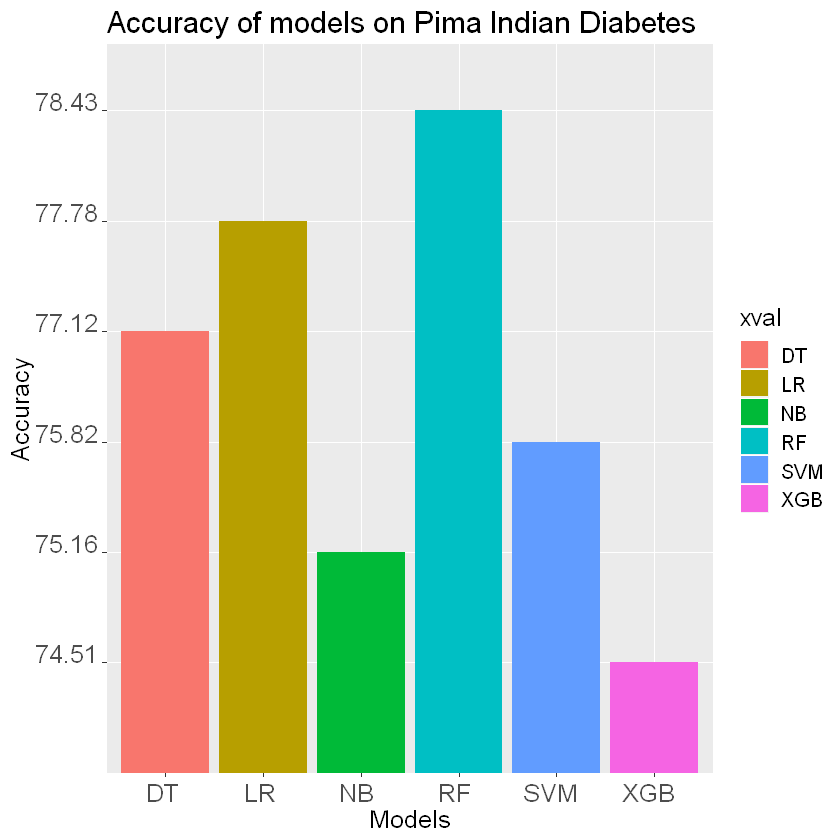

In [30]:
library(ggplot2)
xval<-c("LR","DT","NB","SVM","RF","XGB")
yval<-c(77.78,77.12,75.16,75.82,78.43,74.51)
data_4<-data.frame(xval,yval)
data_4$xval<-as.factor(data_4$xval)
data_4$yval<-as.factor(data_4$yval)
#tiff("D:/recall_3.jpg", width = 4, height = 4, units = 'in', res = 300)
ggplot(data_4, aes(x=xval, y=yval, fill=xval)) + 
  geom_bar(stat="identity") +
  labs(x="Models",y="Accuracy",title="Accuracy of models on Pima Indian Diabetes")+
  theme(text = element_text(size=15),axis.text.x = element_text(angle = 0, vjust = 0.6, hjust=0.6,size=15),axis.text.y = element_text(angle = 0, vjust = 0, hjust=0.5,size=15))

# PRECISION

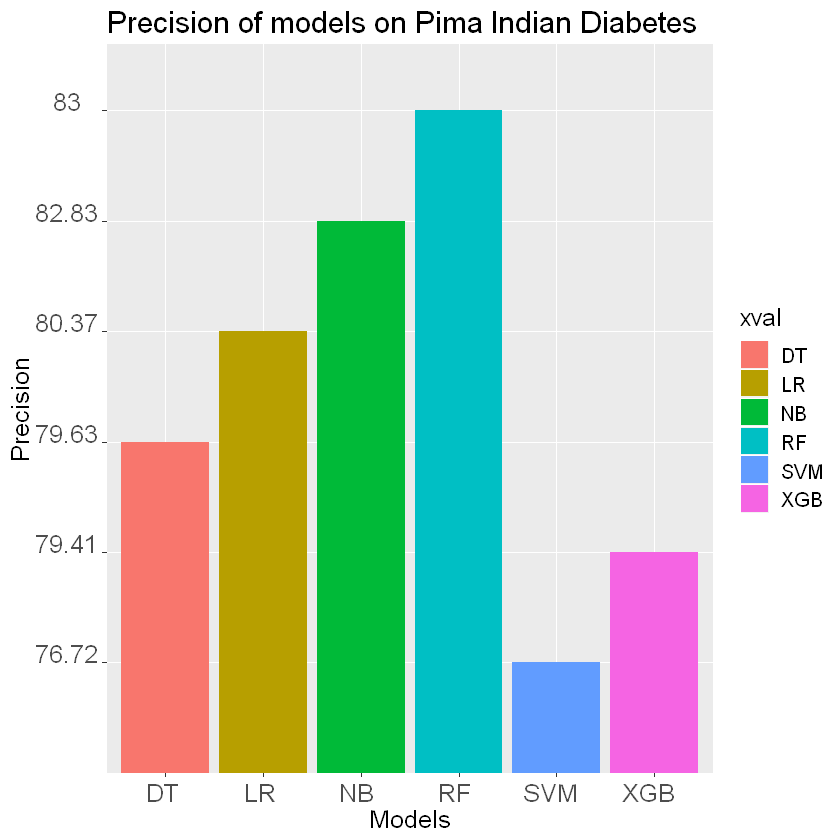

In [31]:
xval<-c("LR","DT","NB","SVM","RF","XGB")
yval<-c(80.37,
79.63,
82.83,
76.72,
83,
79.41)
data_4<-data.frame(xval,yval)
data_4$xval<-as.factor(data_4$xval)
data_4$yval<-as.factor(data_4$yval)
#tiff("D:/recall_3.jpg", width = 4, height = 4, units = 'in', res = 300)
ggplot(data_4, aes(x=xval, y=yval, fill=xval)) + 
  geom_bar(stat="identity") +
  labs(x="Models",y="Precision",title="Precision of models on Pima Indian Diabetes")+
  theme(text = element_text(size=15),axis.text.x = element_text(angle = 0, vjust = 0.6, hjust=0.6,size=15),axis.text.y = element_text(angle = 0, vjust = 0, hjust=0.5,size=15))

# RECALL

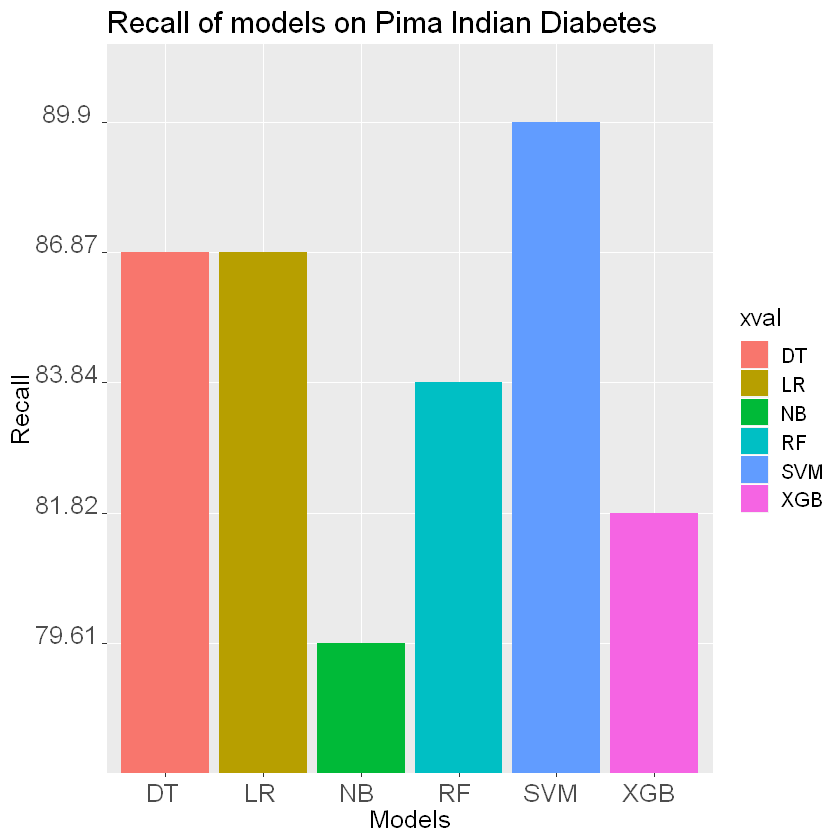

In [32]:
xval<-c("LR","DT","NB","SVM","RF","XGB")
yval<-c(86.87,
86.87,
79.61,
89.9,
83.84,
81.82)
data_4<-data.frame(xval,yval)
data_4$xval<-as.factor(data_4$xval)
data_4$yval<-as.factor(data_4$yval)
#tiff("D:/recall_3.jpg", width = 4, height = 4, units = 'in', res = 300)
ggplot(data_4, aes(x=xval, y=yval, fill=xval)) + 
  geom_bar(stat="identity") +
  labs(x="Models",y="Recall",title="Recall of models on Pima Indian Diabetes")+
  theme(text = element_text(size=15),axis.text.x = element_text(angle = 0, vjust = 0.6, hjust=0.6,size=15),axis.text.y = element_text(angle = 0, vjust = 0, hjust=0.5,size=15))

# F1-SCORE

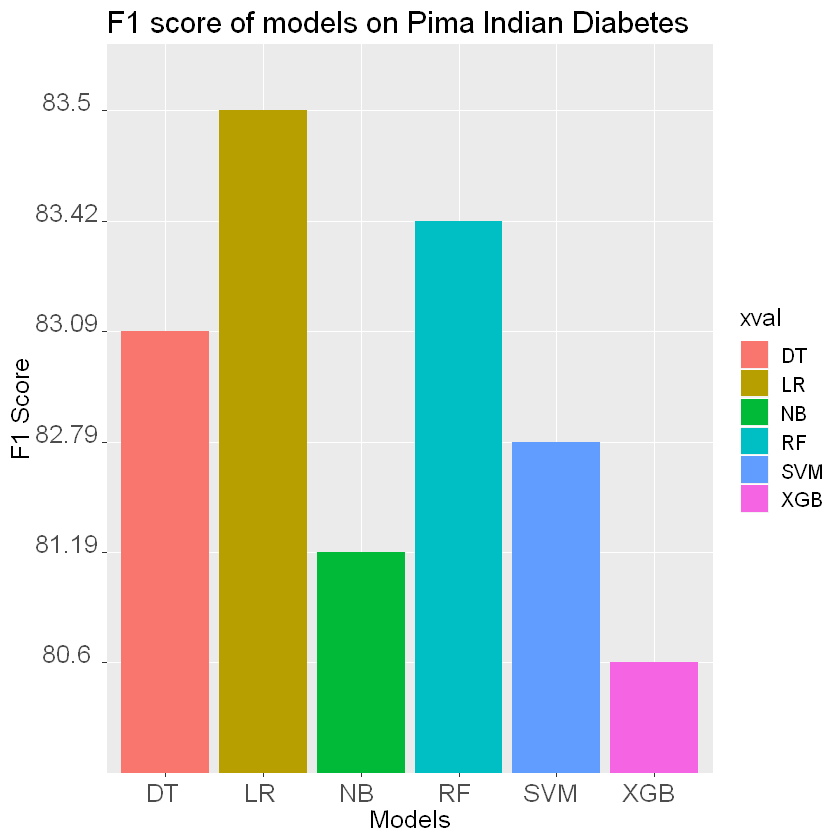

In [33]:
xval<-c("LR","DT","NB","SVM","RF","XGB")
yval<-c(83.5,
83.09,
81.19,
82.79,
83.42,
80.6)
data_4<-data.frame(xval,yval)
data_4$xval<-as.factor(data_4$xval)
data_4$yval<-as.factor(data_4$yval)
#tiff("D:/recall_3.jpg", width = 4, height = 4, units = 'in', res = 300)
ggplot(data_4, aes(x=xval, y=yval, fill=xval)) + 
  geom_bar(stat="identity") +
  labs(x="Models",y="F1 Score",title="F1 score of models on Pima Indian Diabetes")+
  theme(text = element_text(size=15),axis.text.x = element_text(angle = 0, vjust = 0.6, hjust=0.6,size=15),axis.text.y = element_text(angle = 0, vjust = 0, hjust=0.5,size=15))

# ACCURACY WITH FILTERING AND NORMALIZATION

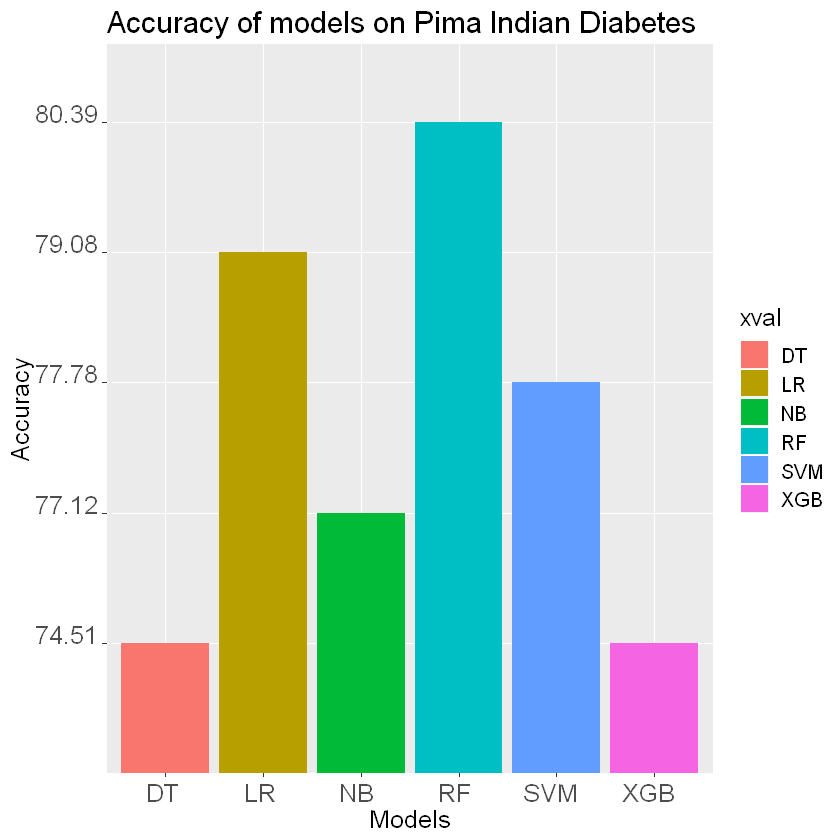

In [34]:
library(ggplot2)
xval<-c("LR","DT","NB","SVM","RF","XGB")
yval<-c(79.08,
74.51,
77.12,
77.78,
80.39,
74.51)
data_4<-data.frame(xval,yval)
data_4$xval<-as.factor(data_4$xval)
data_4$yval<-as.factor(data_4$yval)
#tiff("D:/recall_3.jpg", width = 4, height = 4, units = 'in', res = 300)
ggplot(data_4, aes(x=xval, y=yval, fill=xval)) + 
  geom_bar(stat="identity") +
  labs(x="Models",y="Accuracy",title="Accuracy of models on Pima Indian Diabetes")+
  theme(text = element_text(size=15),axis.text.x = element_text(angle = 0, vjust = 0.6, hjust=0.6,size=15),axis.text.y = element_text(angle = 0, vjust = 0, hjust=0.5,size=15))

# PRECISION WITH NORMALIZATION AND FILTERING

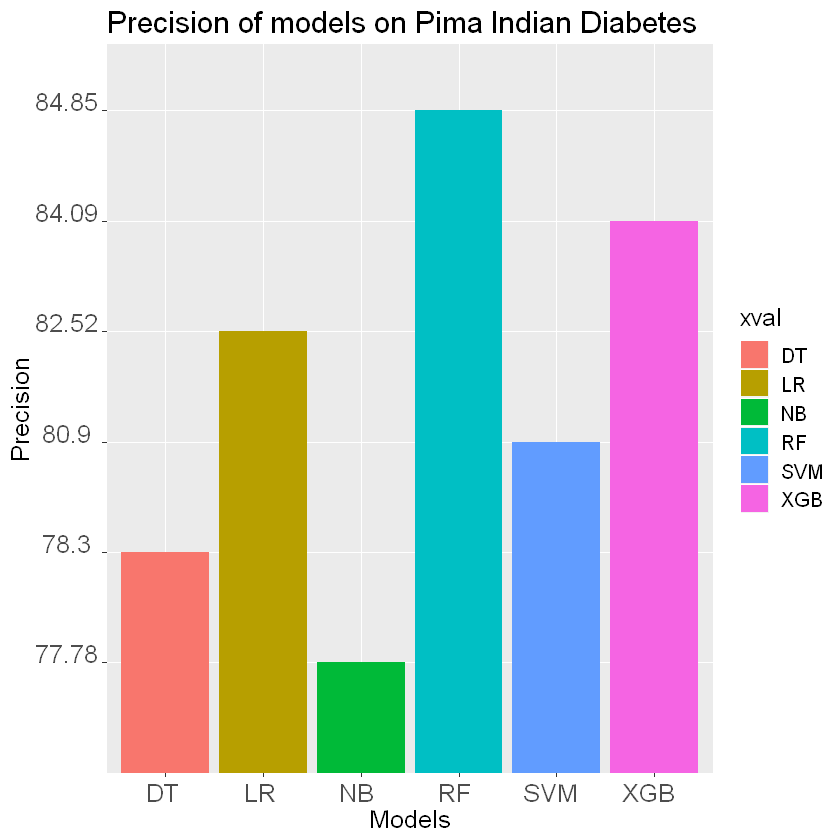

In [35]:
xval<-c("LR","DT","NB","SVM","RF","XGB")
yval<-c(82.52,
78.3,
77.78,
80.9,
84.85,
84.09)
data_4<-data.frame(xval,yval)
data_4$xval<-as.factor(data_4$xval)
data_4$yval<-as.factor(data_4$yval)
#tiff("D:/recall_3.jpg", width = 4, height = 4, units = 'in', res = 300)
ggplot(data_4, aes(x=xval, y=yval, fill=xval)) + 
  geom_bar(stat="identity") +
  labs(x="Models",y="Precision",title="Precision of models on Pima Indian Diabetes")+
  theme(text = element_text(size=15),axis.text.x = element_text(angle = 0, vjust = 0.6, hjust=0.6,size=15),axis.text.y = element_text(angle = 0, vjust = 0, hjust=0.5,size=15))

# RECALL WITH FILTERING AND NORMALIZATION

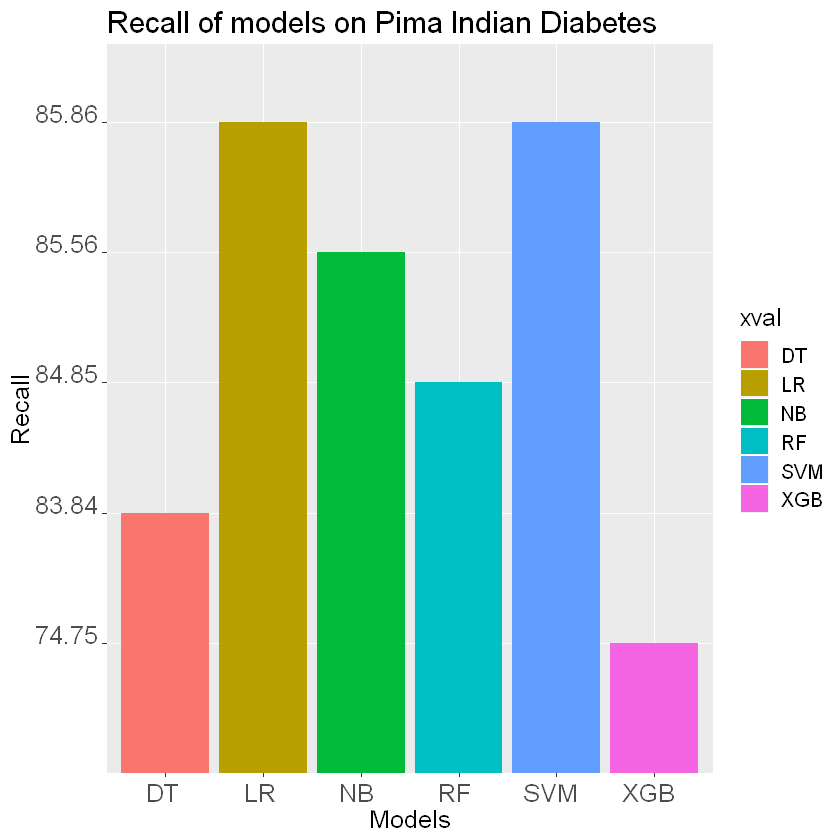

In [36]:
xval<-c("LR","DT","NB","SVM","RF","XGB")
yval<-c(85.86,
83.84,
85.56,
85.86,
84.85,
74.75)
data_4<-data.frame(xval,yval)
data_4$xval<-as.factor(data_4$xval)
data_4$yval<-as.factor(data_4$yval)
#tiff("D:/recall_3.jpg", width = 4, height = 4, units = 'in', res = 300)
ggplot(data_4, aes(x=xval, y=yval, fill=xval)) + 
  geom_bar(stat="identity") +
  labs(x="Models",y="Recall",title="Recall of models on Pima Indian Diabetes")+
  theme(text = element_text(size=15),axis.text.x = element_text(angle = 0, vjust = 0.6, hjust=0.6,size=15),axis.text.y = element_text(angle = 0, vjust = 0, hjust=0.5,size=15))

# F1-SCORE WITH NORMALIZATION AND FILTERING

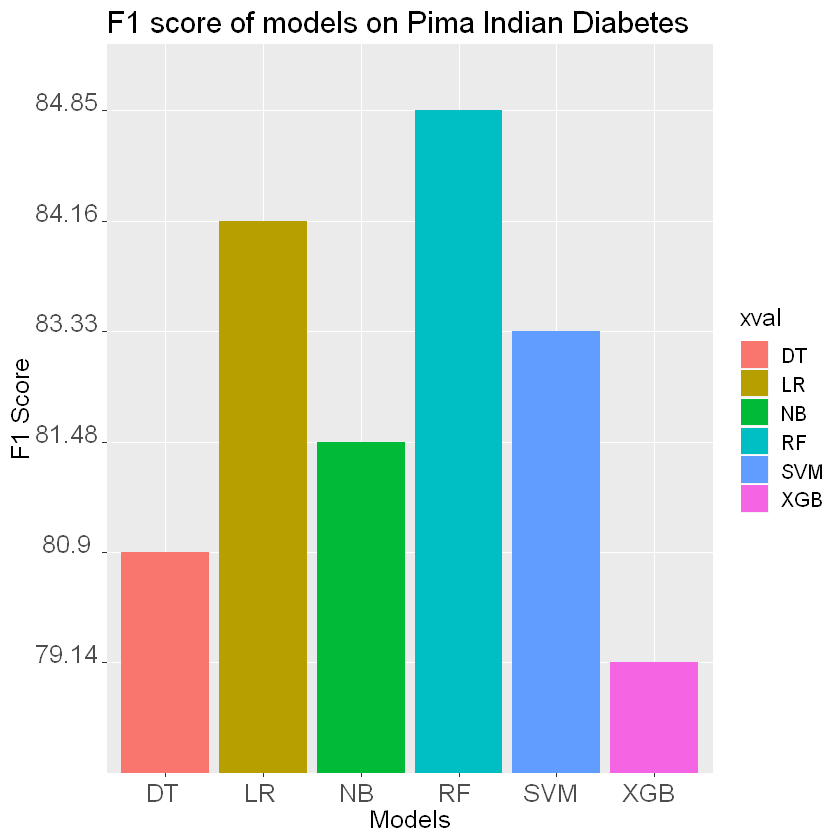

In [37]:
xval<-c("LR","DT","NB","SVM","RF","XGB")
yval<-c(84.16,
80.9,
81.48,
83.33,
84.85,
79.14)
data_4<-data.frame(xval,yval)
data_4$xval<-as.factor(data_4$xval)
data_4$yval<-as.factor(data_4$yval)
#tiff("D:/recall_3.jpg", width = 4, height = 4, units = 'in', res = 300)
ggplot(data_4, aes(x=xval, y=yval, fill=xval)) + 
  geom_bar(stat="identity") +
  labs(x="Models",y="F1 Score",title="F1 score of models on Pima Indian Diabetes")+
  theme(text = element_text(size=15),axis.text.x = element_text(angle = 0, vjust = 0.6, hjust=0.6,size=15),axis.text.y = element_text(angle = 0, vjust = 0, hjust=0.5,size=15))

In [39]:
install.packages("corrplot")
library(corrplot)

Warning message:
"package 'corrplot' is in use and will not be installed"

In [40]:
res =  cor(pima)

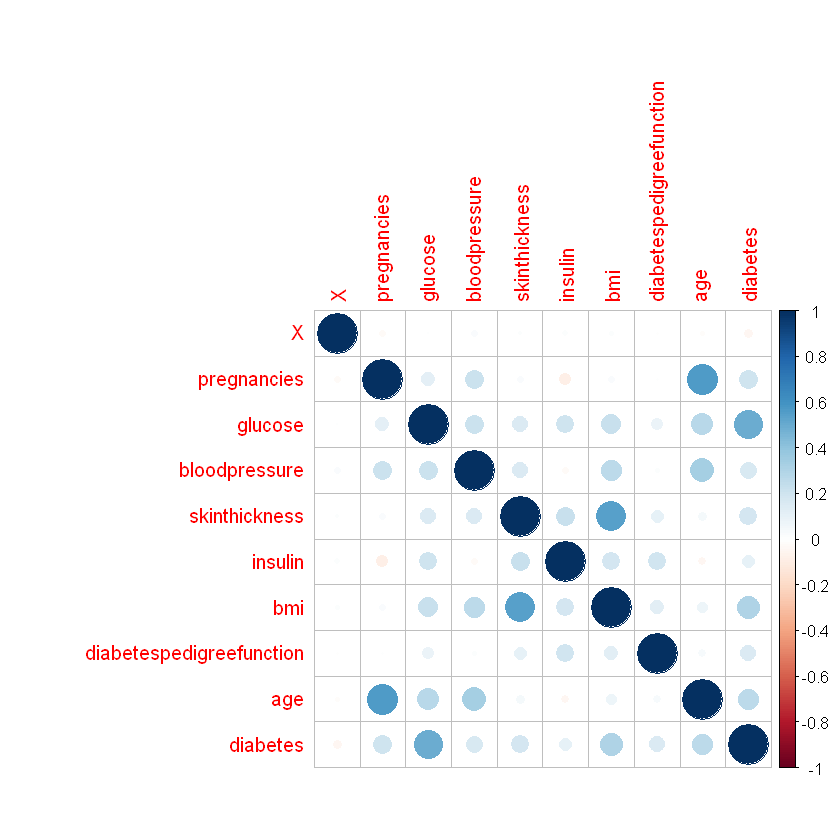

In [43]:
corrplot(res)

In [10]:
library(caret)
library(mlbench)
library(dplyr)
library(base)
library(caTools)
library(e1071)
library(ROCR)
library(Metrics)
library(ggplot2)
library(rpart)
library(randomForest)
library(class)
library(keras)
BiocManager::install("EBImage")
library(EBImage)
library(tensorflow)
install_tensorflow()
reticulate::py_install("pillow", env='r-reticulate')


Testing = 'C:/Users/Praty/Downloads/ar/Testing Dataset'

list.dirs(path='C:/Users/Praty/Downloads/archive (1).zip', full.names = TRUE
          , recursive =  TRUE)

#CREATING OUR OWN DIRECTORIES
base_dir <- "C:/Users/Praty/Downloads/ar/pima2"
dir.create(base_dir)
train_dir <- file.path(base_dir, "training")
dir.create(train_dir)
test_dir <- file.path(base_dir, "testing")
dir.create(test_dir)
train_diab_dir <- file.path(train_dir, "diab")
dir.create(train_diab_dir)
train_norm_dir <- file.path(train_dir, "norm")
dir.create(train_norm_dir)
test_diab_dir <- file.path(test_dir, "diab")
dir.create(test_diab_dir)
test_norm_dir <- file.path(test_dir, "norm")
dir.create(test_norm_dir)

Diabitic = 'C:/Users/Praty/Downloads/ar/diabetic retina/diabetic retina'
Normal   =  'C:/Users/Praty/Downloads/ar/normal retina/normal retina'


split_data <- function(source_dir, training_dest, testing_dest, split_size)
  {
  
  # obtaining a character vector containing the image paths
  files <- list.files(path = source_dir, full.names = T)
  size <- file.size(files)
  
  # removing any corrupt images based on the image size
  shuffled_set <- cbind (files, size) %>%
    subset(size > 0, select = c(files)) %>%
    as.character() %>% 
    # randomizing our data a little
    sample(replace = F)
  
  # splitting our data such that _% goes to training and _% goes to testing
  training_length <- length(shuffled_set) * split_size
  testing_length <- length(shuffled_set) * (1 - split_size)
  
  training_set <- shuffled_set[1:training_length]
  testing_set <- shuffled_set[(training_length+1):length(shuffled_set)]
  
  # copying the training and testing sets into their appropriate destination folders
  # wrapping the function in: invisible {base} to prevent printing of 11,250 TRUE/FALSE :)
  
  invisible (file.copy(from = training_set, to = training_dest))
  invisible (file.copy(from = testing_set, to = testing_dest))
  
}
  split_data(source_dir = Diabitic,
             training_dest = train_diab_dir,
             testing_dest = test_diab_dir,
             split_size = 0.9)
  
  
  # splitting dog images
  split_data(source_dir = Normal,
             training_dest = train_norm_dir,
             testing_dest = test_norm_dir,
             split_size = 0.9)
  
  cat("Total training cat images:", length(list.files(train_diab_dir)), '\n')
  
  
  model <- keras_model_sequential() %>%
    # adding the first convolution layer with 16 3by3 filters
    # we add an additional dimension in the input shape since convolutions operate over 3D tensors
    # the input shape tells the network that the first layer should expect
    # images of 150 by 150 pixels with a color depth of 3 ie RGB images
    layer_conv_2d(input_shape = c(150, 150, 3), filters = 16, kernel_size = c(3, 3), activation = 'relu') %>%
    # adding a max pooling layer which halves the dimensions
    layer_max_pooling_2d(pool_size = c(2, 2)) %>%
    # adding a second convolution layer with 32 filters
    layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = 'relu') %>%
    # adding a pooling layer
    layer_max_pooling_2d(pool_size = c(2, 2)) %>%
    # increasing number of filters as image size decreases
    layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = 'relu') %>%
    layer_max_pooling_2d(pool_size = c(2, 2)) 
  model <- model %>%
    layer_flatten() %>%
    layer_dense(units = 512, activation = 'relu') %>%
    layer_dense(units = 1, activation ='sigmoid')
  model %>% summary()
  
  model %>%
    compile(
      loss = 'binary_crossentropy',
      optimizer = optimizer_rmsprop(lr = 0.001),
      metrics = 'accuracy'
    )
  
  
  
  
  train_datagen <- image_data_generator(rescale = 1/255)
  
  # Flow training images in batches of 250 using train_datagen generator
  
  train_generator <- flow_images_from_directory(
    # target directory
    directory = train_dir,
    # training data generator
    generator = train_datagen,
    # resizing the images to the same dimensions expected by our NN
    target_size = c(150, 150),
    # 250 images at a time to be fed into the NN
    batch_size = 250,
    # Since we use binary_crossentropy loss, we need binary label arrays
    class_mode = 'binary'
  )
  
  
  
  validation_datagen <- image_data_generator(rescale = 1/255)
  
  validation_generator <- flow_images_from_directory(
    # target directory
    directory = test_dir,
    # testing data generator
    generator = validation_datagen,
    # resizing the images to the same dimensions expected by our NN
    target_size = c(150, 150),
    # 250 images at a time to be fed into the NN
    batch_size = 250,
    # Since we use binary_crossentropy loss, we need binary label arrays
    class_mode = 'binary'
  )
  
  
  history <- model %>% fit_generator(
    generator = train_generator,
    # Total number of steps (batches of samples) to yield
    #before declaring one epoch finished and starting the next epoch.
    steps_per_epoch = 90,
    # An epoch is an iteration over the entire data provided
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 5
  )
  

  
  
  

ERROR: Error in library(keras): there is no package called 'keras'
